<a href="https://colab.research.google.com/github/VishalChoudhari2003/Machine-Learning-Algorithms/blob/main/20_Random_Sample_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [9]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [12]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [13]:
x_test.head()

,Age,Fare,Age_imputed
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


In [15]:
# Impute missing 'Age_imputed' values in x_train using random sampling based on 'Fare'
for index, observation in x_train.iterrows():
    if pd.isnull(observation['Age_imputed']):
        # Sample a value from non-null 'Age' in x_train, using 'Fare' as random_state
        sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']) if not pd.isnull(observation['Fare']) else None).values[0]
        x_train.loc[index, 'Age_imputed'] = sampled_value

# Impute missing 'Age_imputed' values in x_test using random sampling based on 'Fare'
for index, observation in x_test.iterrows():
    if pd.isnull(observation['Age_imputed']):
        # Sample a value from non-null 'Age' in x_train, using 'Fare' as random_state
        # Note: We sample from x_train's non-null Age values as per the original code's likely intent
        sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']) if not pd.isnull(observation['Fare']) else None).values[0]
        x_test.loc[index, 'Age_imputed'] = sampled_value

/tmp/ipython-input-15-547872810.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-15-54787281

In [17]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([ 4.  , 30.  , 33.  , 20.  , 20.  , 63.  ,  5.  , 18.  , 44.  ,
       45.  , 16.  , 36.  , 25.  , 25.  , 33.  , 25.  , 43.  , 40.  ,
        2.  , 39.  , 28.5 , 20.  , 34.  , 29.  , 16.  , 45.  , 16.  ,
       42.  , 25.  , 25.  , 16.  , 51.  ,  1.  , 16.  , 13.  , 21.  ,
        9.  , 17.  , 29.  , 45.5 , 18.  ,  3.  , 25.  , 29.  , 23.  ,
       24.  ,  2.  ,  1.  , 31.  , 29.  , 21.  ,  6.  , 35.  , 29.  ,
       35.  , 50.  , 24.  , 26.  , 24.  , 30.  , 25.  , 20.  ,  0.92,
        4.  , 70.5 , 47.  , 32.  , 31.  , 24.  , 27.  , 36.5 , 38.  ,
       41.  , 26.  ,  8.  , 45.  , 44.  , 19.  , 41.  ,  7.  , 20.  ,
       39.  , 22.  , 28.  , 34.  , 28.  , 22.  ,  2.  , 37.  , 15.  ,
       28.  , 24.  , 19.  , 40.5 ,  3.  , 39.  ,  3.  ,  1.  , 70.  ,
       31.  , 18.  , 22.  , 50.  , 80.  , 39.  ,  4.  , 28.  , 50.  ,
       49.  , 31.  , 36.  , 20.  , 38.  , 64.  , 28.  , 17.  , 30.  ,
       17.  , 30.  , 23.  , 31.  , 27.  , 31.  , 24.  , 33.  , 46.  ,
       50.  , 28.  ,

In [18]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,25.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


/tmp/ipython-input-21-1083872633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipython-input-21-1083872633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)


<Axes: xlabel='Age_imputed', ylabel='Density'>

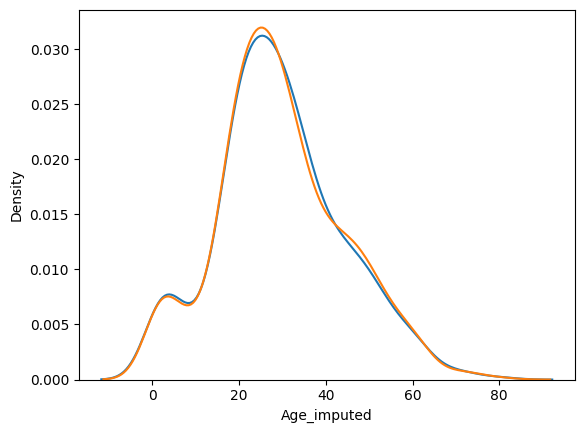

In [21]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

In [23]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  211.95622570817378


In [24]:
x_train[['Age','Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,66.125921
Age_imputed,210.251707,66.125921,211.956226


<Axes: >

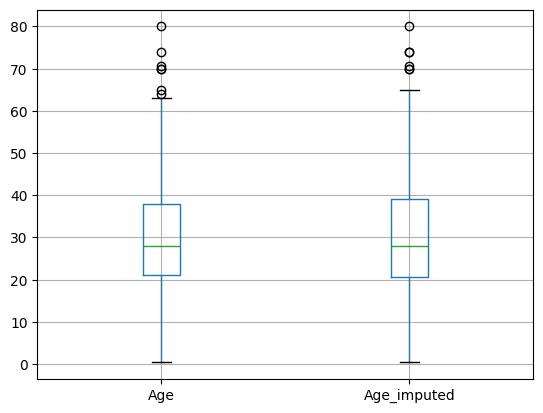

In [27]:
x_train[['Age', 'Age_imputed']].boxplot()

In [29]:
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [31]:
# Example of how you might iterate and use 'observation'
# This assumes you want to do something with each row of x_train
for index, observation in x_train.iterrows():
    sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
    # You would then use sampled_value here, for example, to fill missing 'Age' values
    # print(f"Sampled value for row {index}: {sampled_value.values[0]}")

In [32]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [33]:

data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [34]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [35]:
X = data
y = data['SalePrice']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [44]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1340,NaN,TA,123000,TA,NaN
154,NaN,Fa,125000,Fa,NaN
1162,Po,TA,129000,TA,Po
864,NaN,TA,250580,TA,NaN
1305,Ex,TA,325000,TA,Ex


In [45]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-45-856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/t

In [46]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [47]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [48]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.543210
Fa,0.040917,0.054994
Po,0.027823,0.035915
Ex,0.024550,0.032548


/tmp/ipython-input-49-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-49-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

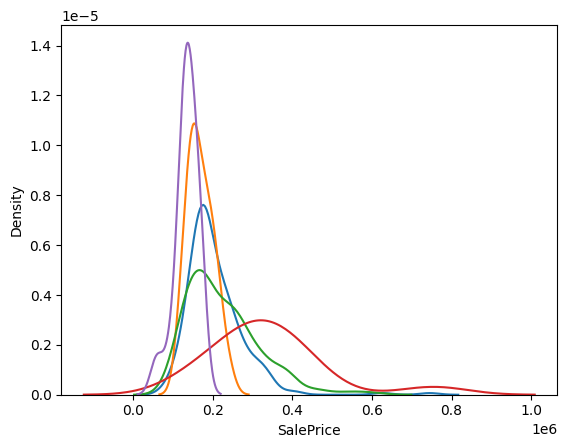

In [49]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-50-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-50-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['F

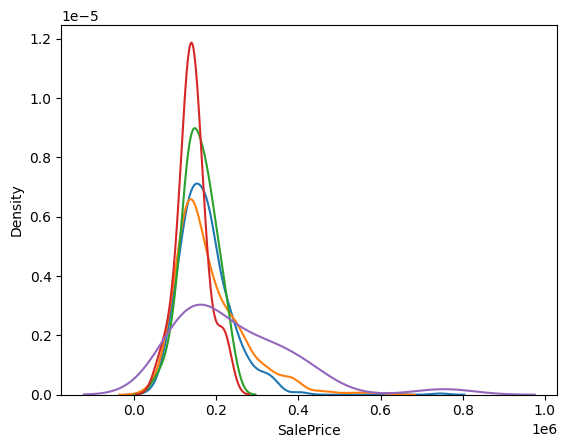

In [50]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()